# Fitting linear models

# Importing libraries and data

In [93]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [226]:
train = pd.read_csv('training_linear_regression.csv', engine='c')
train.dropna(inplace=True, axis=0)

Y = train.rating_change
X = train.drop(['handle', 'rating_change'], axis=1)
X['bias'] = 1

#x = X.loc[0:100,:]
#y = Y.loc[0:100]

# Null model

In [227]:
# null model

ss_tot = np.var(y) * len(y)

ybar = np.mean(y)
ss_tot = np.sum((y-ybar)**2)
ss_res = np.sum((y - 0)**2)

1 - ss_res / ss_tot

-0.12264534526749538

# First order model

In [229]:
results = sm.OLS(Y, X).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     601.3
Date:                Tue, 06 Jun 2017   Prob (F-statistic):               0.00
Time:                        00:50:00   Log-Likelihood:            -1.3257e+06
No. Observations:              229905   AIC:                         2.651e+06
Df Residuals:                  229891   BIC:                         2.651e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_contest            -0.2044      0.03

## Distribution of residuals

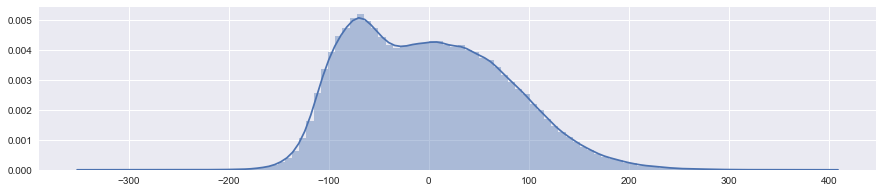

In [260]:
plt.rcParams['figure.figsize'] = (15.0, 3.0)
sns.distplot(results.resid, bins=100)

## Model shows high bias

In [231]:
# shuffle rows of x and y
Xshuff, Yshuff = shuffle(X, Y)

stepsize = 5000
steps = range(stepsize, len(Y), stepsize)
rsq_test = []
rsq_train = []
for size in steps:
    # split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Xshuff[0:size], Yshuff[0:size], test_size=0.33, random_state=42)

    results = sm.OLS(y_train, X_train).fit()
    y_pred = results.predict(X_test)
    rsq_test.append(1 - sum((y_pred - y_test)**2) / sum((y_test - np.mean(y_test))**2))
    rsq_train.append(1 - sum((results.predict() - y_train)**2) / sum((y_train - np.mean(y_train))**2))

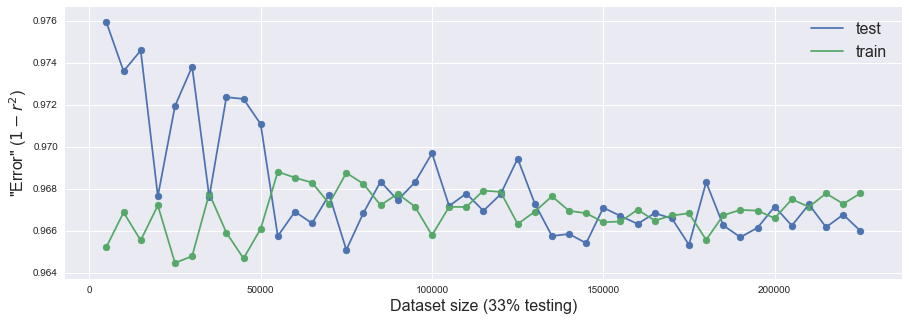

In [276]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.plot(steps, 1-np.array(rsq_test))
plt.scatter(steps, 1-np.array(rsq_test))
plt.plot(steps, 1-np.array(rsq_train))
plt.scatter(steps, 1-np.array(rsq_train))
plt.legend(['test', 'train'], fontsize=16)
plt.xlabel('Dataset size (33% testing)', fontsize=16)
plt.ylabel('"Error" ($1-r^2$)', fontsize=16)

# Secondary orders

In [279]:
from sklearn.preprocessing import PolynomialFeatures
itn = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X2 = itn.fit_transform(X)

results = sm.OLS(Y, test).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 06 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:07:39   Log-Likelihood:            -1.3241e+06
No. Observations:              229905   AIC:                         2.648e+06
Df Residuals:                  229800   BIC:                         2.649e+06
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9631      2.326     19.764      0.0

In [ ]:
# shuffle rows of x and y
Xshuff, Yshuff = shuffle(X2, Y)

stepsize = 10000
steps = range(stepsize, len(Y), stepsize)
rsq_test = []
rsq_train = []
for size in steps:
    # split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Xshuff[0:size], Yshuff[0:size], test_size=0.33, random_state=42)

    results = sm.OLS(y_train, X_train).fit()
    y_pred = results.predict(X_test)
    rsq_test.append(1 - sum((y_pred - y_test)**2) / sum((y_test - np.mean(y_test))**2))
    rsq_train.append(1 - sum((results.predict() - y_train)**2) / sum((y_train - np.mean(y_train))**2))

In [ ]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.plot(steps, 1-np.array(rsq_test))
plt.scatter(steps, 1-np.array(rsq_test))
plt.plot(steps, 1-np.array(rsq_train))
plt.scatter(steps, 1-np.array(rsq_train))
plt.legend(['test', 'train'], fontsize=16)
plt.xlabel('Dataset size (33% testing)', fontsize=16)
plt.ylabel('"Error" ($1-r^2$)', fontsize=16)
